# Intent & Summary
    
    - This notebook code compares performance of a RNN, LSTM and CNN model for classification purposes. We find that:
    -- LSTM model (84% accuracy) is more accurate than a RNN model (81% accuracy)
    -- CNN model (84% accuracy) is nearly accurate as an LSTM model (84% accuracy)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
    
def visualize_model_performance (history):    

    ## Visualizing Model Accuracy on Training & Validation data
    trainAccHistory = history.history['acc']
    validationAccHistory = history.history['val_acc']

    plt.plot(trainAccHistory)
    plt.plot(validationAccHistory)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train Vs Validation Accuracy')
    plt.legend(['Train','Validation'])
    plt.show()

    trainLossHistory = history.history['loss']
    validationLossHistory = history.history['val_loss']

    plt.plot(trainLossHistory)
    plt.plot(validationLossHistory)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train Vs Validation Loss')
    plt.legend(['Train','Validation'])
    plt.show()

In [2]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

max_features=10000
maxlen_per_review=500

(trainX, trainY), (testX, testY) = imdb.load_data(num_words=max_features)

print ('trainx shape is ', trainX.shape)
print ('testX shape is ', testX.shape)

Using TensorFlow backend.
C:\MachineLearning\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


trainx shape is  (25000,)
testX shape is  (25000,)


In [3]:
#pad the reviews so that all reviews are same length
trainX = pad_sequences(trainX, maxlen_per_review)
testX = pad_sequences(testX, maxlen_per_review)

print ('trainx shape is ', trainX.shape)
print ('testX shape is ', testX.shape)

trainx shape is  (25000, 500)
testX shape is  (25000, 500)


## Attempt 1 - Using Simple RNN

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=(max_features), output_dim=50, input_length=(maxlen_per_review)))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()

#fit the model on training data
history = rnn_model.fit (trainX, trainY, validation_split=0.3, epochs=5, batch_size=64)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           500000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 505,101
Trainable params: 505,101
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 46s 3ms/step - loss: 0.5851 - acc: 0.6821 - val_loss: 0.5353 - val_acc: 0.7263
Epoch 2/10
17500/17500 [==============================] - 44s 2ms/step - loss: 0.3875 - acc: 0

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [6]:
yhat = rnn_model.predict_classes(testX)
print ('accuracy is ', accuracy_score(testY, yhat))

accuracy is  0.81772


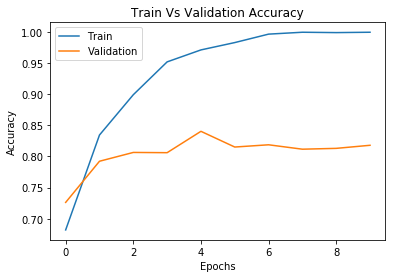

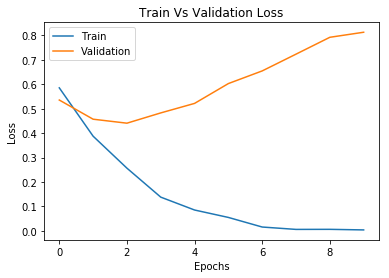

In [7]:
visualize_model_performance(history)

## Atempt 2 - Using LSTM

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM
from keras.utils.vis_utils import plot_model

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=(max_features), output_dim=50, input_length=(maxlen_per_review)))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(LSTM(units=32))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

#fit the model on training data
lstm_history = lstm_model.fit (trainX, trainY, validation_split=0.3, epochs=5, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 530,857
Trainable params: 530,857
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 261s 15ms/step - loss: 0.4411 - acc: 0.7810 - val_loss: 0.3085 - val_acc: 0.8800
Epoch 2/10
17500/17500 [==============================] - 259s 15ms/step - loss:

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [9]:
yhat_lstm = lstm_model.predict_classes(testX)
print ('accuracy is ', accuracy_score(testY, yhat_lstm))

accuracy is  0.84876


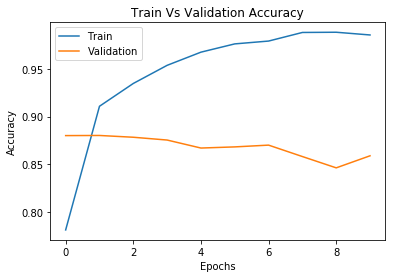

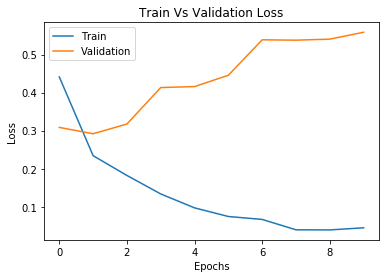

In [10]:
visualize_model_performance(lstm_history)

## Atempt 3 - Using CNN

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils.vis_utils import plot_model

cnnmodel = Sequential()

cnnmodel.add(Embedding(input_dim=(max_features), output_dim=50, input_length=(maxlen_per_review)))

cnnmodel.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
cnnmodel.add(MaxPooling1D(pool_size=5))

cnnmodel.add(Conv1D(filters=16, kernel_size=9, activation='relu'))
cnnmodel.add(MaxPooling1D(pool_size=5))

cnnmodel.add(GlobalMaxPooling1D())

cnnmodel.add(Dense(1, activation='sigmoid'))

cnnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnnmodel.summary()

#plot model and save as png file
#plot_model(model, to_file='reviews_embedding_model.png', show_shapes=True)

#fit the model on training data
cnn_history = cnnmodel.fit (trainX, trainY, validation_split=0.3, epochs=10, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 50)           500000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 16)           5616      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 16)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 90, 16)            2320      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 18, 16)            0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total para

In [12]:
cnn_predicted_yhat = cnnmodel.predict_classes(testX)
from sklearn.metrics import accuracy_score
print (accuracy_score(testY, cnn_predicted_yhat))

0.84016


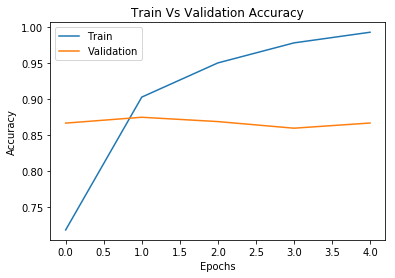

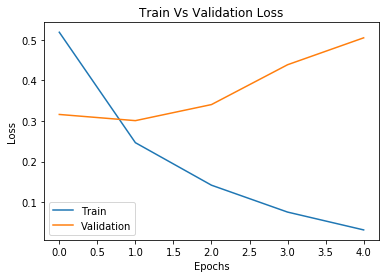

In [13]:
visualize_model_performance(cnn_history)